51.7570592141


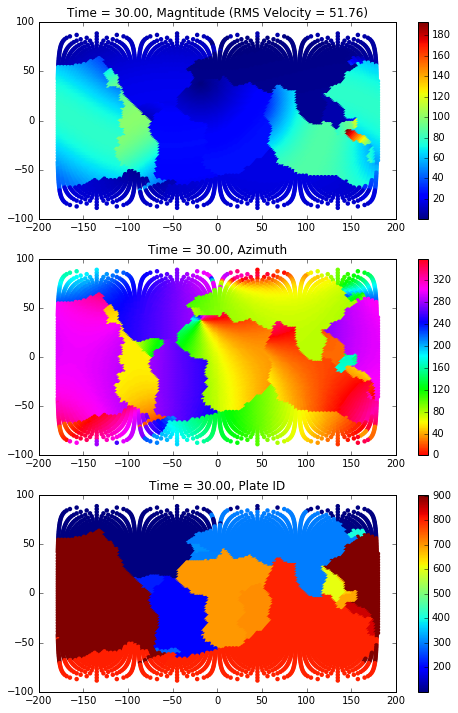

In [69]:
import requests
import json
import geojson
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

%matplotlib inline

proxies = {'http':''}

recon_time = 30

# Send Request for coastlines
r = requests.get('http://127.0.0.1:8000/velocity/plate_polygons/?time=%0.2f' % recon_time,
                 proxies=proxies)
tpb = json.loads(r.text)

data = np.asarray(tpb['coordinates'])

RMS = np.sqrt(np.mean(data[:,2]**2,axis=0))
print RMS

plt.figure(figsize=(8,12))
plt.subplot(311)
plt.scatter(data[:,0],data[:,1],c=data[:,2],edgecolors='')
plt.title('Time = %0.2f, Magntitude (RMS Velocity = %0.2f)' % (recon_time,RMS))
plt.colorbar()
plt.subplot(312)
plt.scatter(data[:,0],data[:,1],c=np.degrees(data[:,3]),edgecolors='',cmap=plt.cm.hsv)
plt.title('Time = %0.2f, Azimuth' % (recon_time))
plt.colorbar()
plt.subplot(313)
plt.scatter(data[:,0],data[:,1],c=data[:,4],edgecolors='')
plt.title('Time = %0.2f, Plate ID' % (recon_time))
plt.colorbar()
plt.show()


38.4259638145


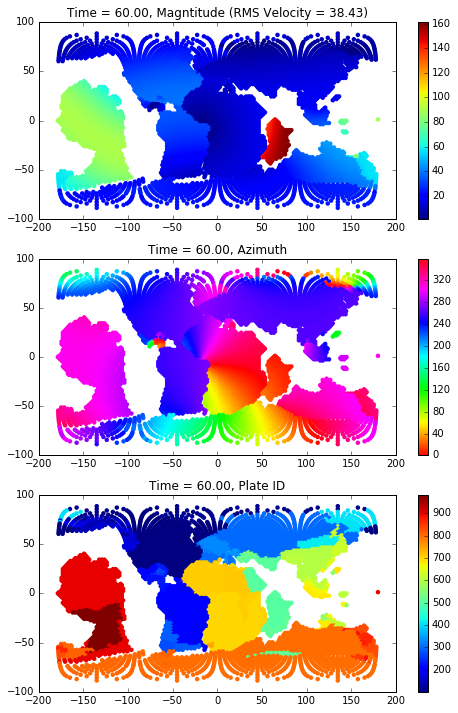

In [70]:
recon_time = 60

# Send Request for coastlines
r = requests.get('http://127.0.0.1:8000/velocity/static_polygons/?time=%0.2f' % recon_time,
                 proxies=proxies)
tpb = json.loads(r.text)

data = np.asarray(tpb['coordinates'])

RMS = np.sqrt(np.mean(data[:,2]**2,axis=0))
print RMS

index = np.where(data[:,4]>0)

plt.figure(figsize=(8,12))
plt.subplot(311)
plt.scatter(data[index,0],data[index,1],c=data[index,2],edgecolors='')
plt.title('Time = %0.2f, Magntitude (RMS Velocity = %0.2f)' % (recon_time,RMS))
plt.colorbar()
plt.subplot(312)
plt.scatter(data[index,0],data[index,1],c=np.degrees(data[index,3]),edgecolors='',cmap=plt.cm.hsv)
plt.title('Time = %0.2f, Azimuth' % (recon_time))
plt.colorbar()
plt.subplot(313)
plt.scatter(data[index,0],data[index,1],c=data[index,4],edgecolors='')
plt.title('Time = %0.2f, Plate ID' % (recon_time))
plt.colorbar()
plt.show()

